# Week 3 Day 1

Welcome to Google Colab - using free and powerful compute in the cloud.

Google Colab gives you a remote Notebook-style browser window on to a machine, and you run code "locally" on that machine.

## Benefits of Colab

1. Free access to T4 GPUs!
2. Easy ability to share code and collaborate on it
3. Everyone gets to use identical code - no environment differences

## Downsides of Colab

1. As it's free, Google reserves the right to bump you off the box at any point ("reset the runtime"), and this happens most quickly if no code is running. They can also downgrade you from a T4 to a CPU-only box. Sometimes this happens silently. You need to start everything again from the top. Paid plans last longer.
2. You need to pip install packages every single time (but no pip installs today)
3. There's some latency - it's not as interactive as coding on your own box

## Survival Guide

1. Always start by pressing the drop down arrow by Connect on the top right, and "Connect to a hosted runtime: T4"
2. From that dropdown, "View Resources" to check you have a GPU and monitor memory
3. If things go awry, Runtime >> Disconnect and Delete Runtime, Connect again, and then run cells from the top
4. Always run the pip installs! Ignore pip dependency errors.

Runtime >> Restart session: this restarts the Python Kernel, but pip packages remain installed and the disk remains the same.

Runtime >> Disconnect and delete session. This wipes everything.

In [2]:
# I've had to add in this pip install since making the video, as HuggingFace made a breaking change!

!pip install -q --upgrade transformers==4.56.2 diffusers==0.32.2

In [3]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Sun Feb 15 10:48:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             32W /   70W |   13015MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Connecting Hugging Face

You'll need to log in to the HuggingFace hub if you've not done so before.

1. If you haven't already done so, create a **free** HuggingFace account at https://huggingface.co and navigate to Settings from the user menu on the top right. Then select Access Tokens, then click the Create new token button near the top right. THEN be sure to click the button "Write" under 'Token type'.

  **IMPORTANT** when you create your HuggingFace Access Token, please be sure to select WRITE permissions for your key by clicking on the "Write" button, otherwise you may get problems later. Not "fine-grained" but "Write".

  In the field "Token name" you can put anything you want, like "My HF Token". This field is just for your reference.

  Then press "Create token" and then copy it into your clipboard, and keep a record of your token! It should start "hf_..."

2. Back here in colab, press the "key" icon on the side panel to the left, and add a new secret:  
  In the name field put `HF_TOKEN`  
  In the value field put your actual access token: `hf_...`  
  Ensure the notebook access switch is turned ON.

3. Execute the cell below to log in. You'll need to do this on each of your colabs. It's a really useful way to manage your secrets without needing to type them into colab.

In [4]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

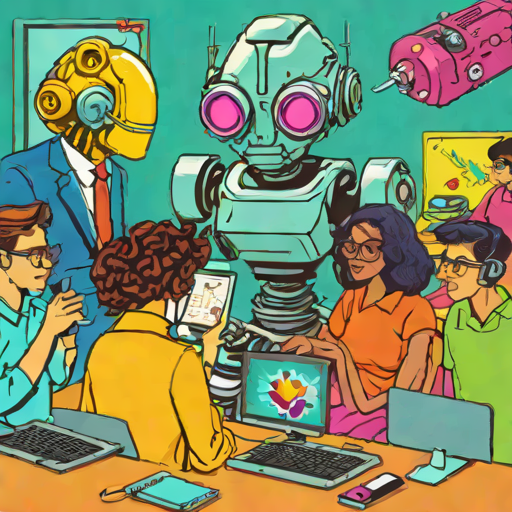

In [5]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "A class of students learning AI engineering in a vibrant pop-art style"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)


In [ ]:
# Restart the kernel

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
from IPython.display import display
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

prompt = "A class of data scientists learning AI engineering in a vibrant high-energy pop-art style"

image = pipe(prompt=prompt, num_inference_steps=30).images[0]

display(image)


In [ ]:
# Restart the kernel

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/4.52G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

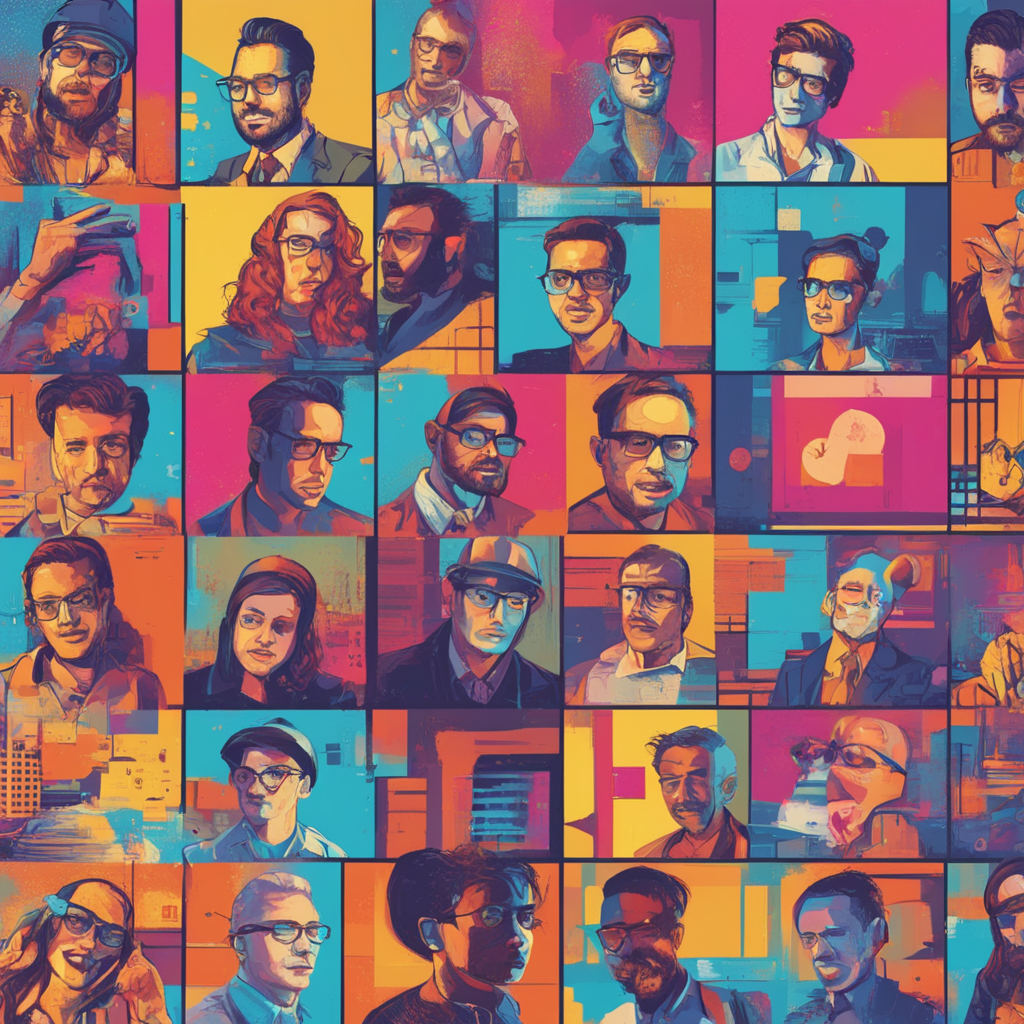

In [1]:
# Import DiffusionPipeline to load Stable Diffusion models
from diffusers import DiffusionPipeline

# Import torch for GPU usage and tensor precision control
import torch


# Load the SDXL BASE model
# This model is responsible for:
# 1. Understanding the text prompt
# 2. Generating the initial latent image (rough structure)
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,      # Use FP16 to save GPU memory
    variant="fp16",                 # Load the FP16 weights
    use_safetensors=True            # Faster and safer model loading
)

# Move the model to GPU
base.to("cuda")


# Load the SDXL REFINER model
# This model improves details and sharpness of the image
# We reuse the text encoder and VAE from the base model
# to save memory and keep consistency
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,  # Share text encoder with base
    vae=base.vae,                        # Share VAE with base
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)

# Move the refiner to GPU
refiner.to("cuda")


# Total diffusion steps (more steps = better quality but slower)
n_steps = 40

# Fraction of steps handled by the base model
# 0.8 means:
# Base model: 80% of denoising
# Refiner: last 20%
high_noise_frac = 0.8


# Text prompt describing the image
prompt = "A class of data scientists learning AI engineering in a vibrant high-energy pop-art style"


# -------- STEP 1: Generate latent image using BASE model --------
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,     # Total diffusion steps
    denoising_end=high_noise_frac,   # Stop at 80% of the denoising process
    output_type="latent",            # Return latent representation instead of final image
).images


# -------- STEP 2: Refine the image using REFINER model --------
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac, # Start where base stopped
    image=image,                     # Pass latent image from base model
).images[0]


# Display the final generated image
display(image)


In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
!pip install --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [2]:
# Hugging Face pipeline provides ready-to-use models for tasks like TTS
from transformers import pipeline

# Used to load datasets (here, speaker voice embeddings)
from datasets import load_dataset

# Library to handle audio files (not directly used here but often used to save audio)
import soundfile as sf

# PyTorch for tensor handling and GPU execution
import torch

# Utility to play audio inside a notebook
from IPython.display import Audio


# Load a Text-to-Speech pipeline
# "microsoft/speecht5_tts" converts text into speech
# device='cuda' tells it to run on GPU for faster generation
synthesiser = pipeline(
    "text-to-speech",
    "microsoft/speecht5_tts",
    device='cuda'
)


# Load a dataset containing speaker voice embeddings (xvectors)
# These embeddings control the voice characteristics (pitch, tone, accent)
embeddings_dataset = load_dataset(
    "matthijs/cmu-arctic-xvectors",
    split="validation",
    trust_remote_code=True
)


# Select one speaker embedding from the dataset
# 7306 is just an index representing one voice
# Convert it to a PyTorch tensor and add batch dimension
speaker_embedding = torch.tensor(
    embeddings_dataset[7306]["xvector"]
).unsqueeze(0)


# Generate speech from text
speech = synthesiser(
    "Hi to an artificial intelligence engineer, on the way to mastery!",

    # Pass speaker embedding to control voice identity
    forward_params={
        "speaker_embeddings": speaker_embedding
    }
)


# Play the generated audio in the notebook
Audio(
    speech["audio"],             # waveform data
    rate=speech["sampling_rate"] # playback speed
)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

cmu-arctic-xvectors.py: 0.00B [00:00, ?B/s]

spkrec-xvect.zip:   0%|          | 0.00/17.9M [00:00<?, ?B/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

## This next cells will only work on a powerful GPU box like an A100

This is not available on a free T4 box.

I just want to show off what's possible with a small paid budget..

Rough pricing:

- $9.99 = 100 compute units
- An A100 = 5.37 compute units per hour as of Oct 2025 (for me)

In [ ]:
# Let's check the GPU - it should be an A100

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('A100') >= 0:
    print("Success - Connected to an NVIDIA A100")
  else:
    print("NOT CONNECTED TO AN A100")

## Quick extra step - requesting access to the model

Please visit this page, logging in with your HuggingFace account:  
https://huggingface.co/black-forest-labs/FLUX.1-schnell

Near the top, you should see a section where you can request access to this gated model. You may just need to agree to the terms of service. Once your access has been approved, this should change to:

"You have been granted access to this model"

And then the next cell should work. (Otherwise you'll get an error that you haven't been granted access to the gated model.)

Thanks Chris C. for the pointer!

In [ ]:
import torch
from diffusers import FluxPipeline
from IPython.display import display
from datetime import datetime

start = datetime.now()

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to("cuda")
generator = torch.Generator(device="cuda").manual_seed(0)
prompt = "A class of data scientists learning AI engineering in a vibrant high-energy pop-art style"

# Generate the image using the GPU
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=generator
).images[0]

display(image)

stop = datetime.now()


In [ ]:
# Cost estimate

seconds = (stop-start).total_seconds()
units_per_hour = 5.37
estimated_units = (5.37 / 3600) * seconds
estimated_cost = estimated_units * (9.99/100)
print(f"This took {seconds:.1f} seconds and cost an estimated ${estimated_cost:.3f}")

# But there's a catch - you pay for all the time the kernel is active, not just while it's actually calculating!
# So remember to shut down a Paid kernel..